In [1]:
import GAN.models as models
import GAN.toy_datasets as toys
import GAN.plotting as plotting

Using TensorFlow backend.


In [2]:
reload(models)

gan = models.MyFFGAN( (1,1), (1,1), 
                     g_opts=dict(name="G_16x5",kernel_sizes=[16]*5),
                     d_opts=dict(name="D_512x5",kernel_sizes=[512]*5)
                    )

In [3]:
gan.get_generator()

(1, 1)


In [4]:
gan.get_discriminator()

In [5]:
gan.compile()

(<keras.engine.training.Model at 0x2b51307f1978>,
 <keras.engine.training.Model at 0x2b5130766b70>)

In [6]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_16x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_16x5_up1_dense (Dense)         (None, 1, 16)         32          G_16x5_input[0][0]               
____________________________________________________________________________________________________
G_16x5_up1_activ (PReLU)         (None, 1, 16)         16          G_16x5_up1_dense[0][0]           
____________________________________________________________________________________________________
G_16x5_up2_dense (Dense)         (None, 1, 16)         272         G_16x5_up1_activ[0][0]           
___________________________________________________________________________________________

In [7]:
gan.get_discriminator().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_512x5_input (InputLayer)   (None, 1, 1)              0         
_________________________________________________________________
D_512x5_down1_dense (Dense)  (None, 1, 512)            1024      
_________________________________________________________________
D_512x5_down1_activ (Activat (None, 1, 512)            0         
_________________________________________________________________
D_512x5_down2_dense (Dense)  (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_down2_activ (Activat (None, 1, 512)            0         
_________________________________________________________________
D_512x5_down3_dense (Dense)  (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_down3_activ (Activat (None, 1, 512)            0         
__________

In [8]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_16x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_16x5_up1_dense (Dense)         (None, 1, 16)         32          G_16x5_input[0][0]               
____________________________________________________________________________________________________
G_16x5_up1_activ (PReLU)         (None, 1, 16)         16          G_16x5_up1_dense[0][0]           
____________________________________________________________________________________________________
G_16x5_up2_dense (Dense)         (None, 1, 16)         272         G_16x5_up1_activ[0][0]           
___________________________________________________________________________________________

In [9]:
gan.dm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_512x5_input (InputLayer)   (None, 1, 1)              0         
_________________________________________________________________
D_512x5_down1_dense (Dense)  (None, 1, 512)            1024      
_________________________________________________________________
D_512x5_down1_activ (Activat (None, 1, 512)            0         
_________________________________________________________________
D_512x5_down2_dense (Dense)  (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_down2_activ (Activat (None, 1, 512)            0         
_________________________________________________________________
D_512x5_down3_dense (Dense)  (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_down3_activ (Activat (None, 1, 512)            0         
__________

In [10]:
import GAN.toy_datasets as toys

In [11]:
reload(toys)

x_train,x_test,z_train,z_test = toys.two_peaks(100000) 

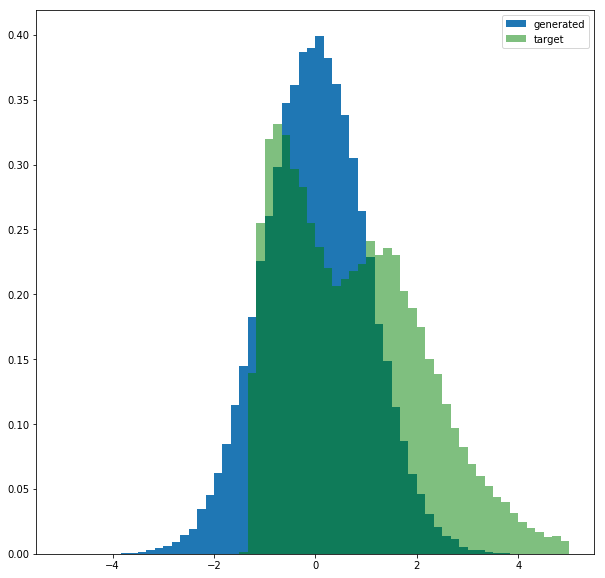

In [12]:
plotting.plot_hists(x_train.ravel(),z_train.ravel())

In [13]:
# reload(toys)

# x,z = toys.three_peaks(100000)

# plotting.plot_hists(x.ravel(),z.ravel())

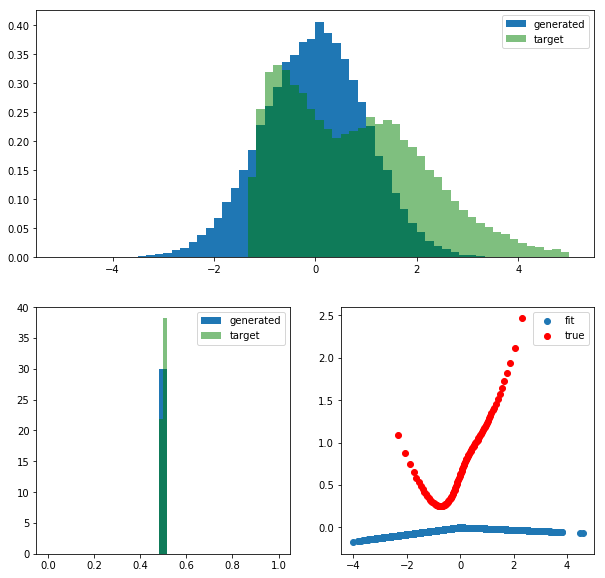

0: D: [0.694051 0.392578] A: [0.692225 0.464844]
0: D: [0.665322 0.591797] A: [0.772831 0.292969]
0: D: [0.692281 0.494141] A: [0.709552 0.046875]
0: D: [0.693425 0.511719] A: [0.706641 0.128906]
0: D: [0.693431 0.478516] A: [0.697756 0.316406]


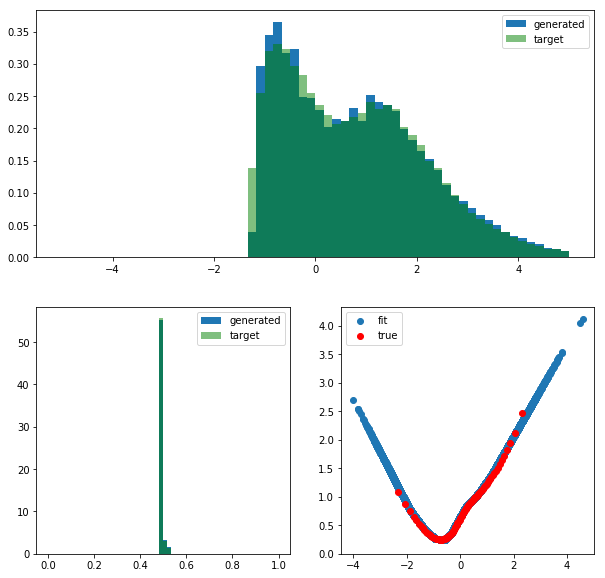

0: D: [0.693217 0.488281] A: [0.695907 0.250000]
0: D: [0.692987 0.492188] A: [0.695812 0.214844]
0: D: [0.693011 0.531250] A: [0.694014 0.492188]
0: D: [0.693206 0.511719] A: [0.692746 0.679688]


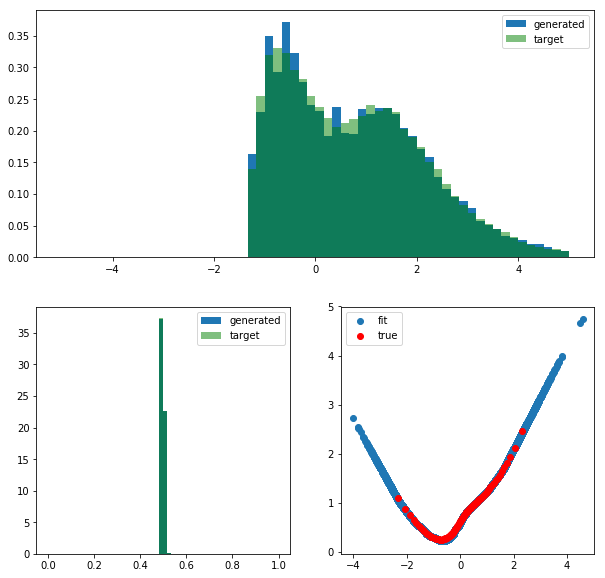

0: D: [0.693408 0.458984] A: [0.693239 0.585938]


In [14]:
probs = np.arange(1,100,1)
cdf_x = np.percentile(x_train,probs)
cdf_z = np.percentile(z_train,probs)


gan.fit(x_train,z_train,n_epochs=10,solution=(cdf_x,cdf_z))